In [145]:
### Objectif : etude de l'insertion professionelle des etudiants issus de master 

## description ( du site data gouv fr ) 

Ces informations sont basées sur les données collectées dans le cadre de l'opération nationale de collecte de données sur l’insertion professionnelle des diplômés de Master.

Cette enquête a été menée :
en décembre 2013, 30 mois après l’obtention de leur diplôme, auprès de 59 600 diplômés de Master de la session 2011.
en décembre 2012, 30 mois après l’obtention de leur diplôme, auprès de 47 500 diplômés de Master de la session 2010.
Le taux d’insertion est défini comme étant le pourcentage de diplômés occupant un emploi, quel qu’il soit, sur l’ensemble des diplômés présents sur le marché du travail. Il est calculé sur les diplômés de nationalité française, issus de la formation initiale, entrés immédiatement et durablement sur le marché du travail après l’obtention de leur diplôme en 2011. Les diplômés vérifiant ces conditions représentent 38 % de l’ensemble des diplômés de Master (39 % pour la session 2010).

L’information collectée sur le salaire porte sur le salaire net, primes comprises. Les salaires affichés correspondent aux valeurs médianes sur les emplois à temps plein. A partir de ces valeurs, on estime un salaire brut annuel, sur la base d’un taux forfaitaire de passage du net au brut de 1,3 (donnée moyenne constatée sur les salaires du secteur privé).

L’enquête a été menée par les universités dans le cadre d’une charte dont les dispositions visent à garantir la comparabilité des résultats entre les établissements. La coordination d’ensemble et l’exploitation de l’enquête sont prises en charge par le ministère en charge de l'Enseignement supérieur et de la Recherche.

En 2011, le taux de réponses exploitables sur l’ensemble des universités est de 71 % (70 % pour la session 2010) mais ce taux varie sensiblement d’une université à l’autre (de 92 % à 28 % pour la session 2011, de 93 % à 9 % pour la session 2010). Le taux de réponse et les effectifs de répondants jouant sur la qualité des données, il a été décidé de ne pas diffuser les résultats des universités ayant des effectifs de répondants trop faibles (moins de 30) ou un taux de réponse inférieur à 30 % et de signaler par la mention « résultats fragiles » celles dont le taux de réponse est inférieur à 50 %.

## Description des données :
    
Libellés des variables des fichiers exportés (pour l'année N) :

nombre_de_reponses : Nombre de réponses

taux_de_reponse : Taux de réponse

poids_de_la_discipline : Poids de la discipline

emplois_cadre_ou_professions_intermediaires : Part des emplois de niveau cadre ou profession intermédiaire

emplois_stables : Part des emplois stables

emplois_a_temps_plein : Part des emplois à temps plein

salaire_net_median_des_emplois_a_temps_plein : Salaire net mensuel médian des emplois à temps plein

salaire_brut_annuel_estime : Salaire brut annuel médian estimé
de_diplomes_boursiers : Part des diplômés boursiers dans l'établissement

taux_de_chomage_regional : Taux de chômage régional (INSEE : 4ème trimestre N+2)

salaire_net_mensuel_median_regional : Salaire mensuel net médian des jeunes de 25 à 29 ans employés à temps plein dans les catégories cadre et professions intermédiaires (INSEE : DADS N)

taux_dinsertion : Taux d'insertion

emplois_cadre : Part des emplois de niveau cadre (Dans certains secteurs d'activité, les emplois correspondants au diplôme ne sont pas tous de niveau cadre. L'accès au niveau cadre peut nécessiter une expérience professionnelle préalable.)

emplois_exterieurs_a_la_region_de_luniversite Part des emplois situés en dehors de la région de l'établissement (y compris à l'étranger)

femmes : Part des femmes

## Données complémentaires :

% de diplômés boursiers : données observées sur la population de l'enquête sur l'insertion professionnelle.

Taux de chômage régional : INSEE - 4ème trimestre 2012 pour la session 2010, 4ème trimestre 2013 pour la session 2011.

Salaire net mensuel médian régional : INSEE DADS 2010 pour la session 2010 et INSEE DADS 2011 pour la session 2010 - pour les 25-29 ans employés à temps plein dans les catégories socioprofessionnelles "Cadres et professions intellectuelles supérieures" et " Professions intermédiaires.

Légende : nd = non disponible (aucun répondant) ns = non significatif (nombre de répondants inférieur à 30).

## Phase 1 : Nettoyage des données et analyse explorative :

In [146]:
#imports :

import pandas as pd # pandas pour la manipulation de données 
import numpy as np # numpy pour certaines operations sur les series
import plotly.express as px # plotly express pour des representations graphiques interactives

# extra librairies de visionnage
import plotly.graph_objects as go

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [147]:
#lecture du fichier et premiere vue

insertion_df = pd.read_csv(f"data/fr-esr-insertion_professionnelle-master.csv",encoding="utf8",sep=";")
print(f"noms variables et types de données : \n {insertion_df.dtypes}")    
display(insertion_df.head()) 
print(f"b lignes et colonnes \n {insertion_df.shape}")

print(insertion_df.columns)

noms variables et types de données : 
 annee                                              int64
diplome                                           object
numero_de_l_etablissement                         object
etablissement                                     object
etablissementactuel                               object
code_de_l_academie                                object
academie                                          object
code_du_domaine                                   object
domaine                                           object
code_de_la_discipline                             object
discipline                                        object
situation                                         object
remarque                                          object
nombre_de_reponses                               float64
taux_de_reponse                                  float64
poids_de_la_discipline                            object
taux_dinsertion                                  

/tmp/ipykernel_125353/3841167639.py:3: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



annee     diplome numero_de_l_etablissement            etablissement  \
0   2010  MASTER LMD                  0060931E  Nice - Sophia-Antipolis   
1   2010  MASTER LMD                  0060931E  Nice - Sophia-Antipolis   
2   2010  MASTER LMD                  0134009M            Aix-Marseille   
3   2010  MASTER LMD                  0134009M            Aix-Marseille   
4   2010  MASTER LMD                  0141408E           Caen Normandie   

            etablissementactuel code_de_l_academie       academie  \
0  Université Côte d'Azur (UCA)                A23           Nice   
1  Université Côte d'Azur (UCA)                A23           Nice   
2                           NaN                A02  Aix-Marseille   
3                           NaN                A02  Aix-Marseille   
4                           NaN                A70      Normandie   

  code_du_domaine                        domaine code_de_la_discipline  ...  \
0             DEG     Droit, économie et gestion                disc04  ...   
1             SHS  Sciences humaines et sociales                disc08  ...   
2             SHS  Sciences humaines et sociales                disc08  ...   
3             SHS  Sciences humaines et sociales                disc10  ...   
4             DEG     Droit, économie et gestion                disc01  ...   

  taux_de_chomage_regional salaire_net_mensuel_median_regional emplois_cadre  \
0                     11.7                                1750            nd   
1                     11.7                                1750            nd   
2                     11.7                                1750            nd   
3                     11.7                                1750            nd   
4                      9.7                                1680            nd   

   emplois_exterieurs_a_la_region_de_luniversite  femmes  \
0                                             nd      nd   
1                                             nd      nd   
2                                             nd      nd   
3                                             nd      nd   
4                                             nd      nd   

  salaire_net_mensuel_regional_1er_quartile  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

  salaire_net_mensuel_regional_3eme_quartile                    cle_etab  \
0                                        NaN  Nice - Sophia-Antipolis_30   
1                                        NaN  Nice - Sophia-Antipolis_30   
2                                        NaN            Aix-Marseille_30   
3                                        NaN            Aix-Marseille_30   
4                                        NaN           Caen Normandie_30   

    cle_disc id_paysage  
0  disc04_30      7CYWd  
1  disc08_30      7CYWd  
2  disc08_30      xJdyB  
3  disc10_30      xJdyB  
4  disc01_30      p25Q3  

[5 rows x 33 columns]

b lignes et colonnes 
 (17669, 33)
Index(['annee', 'diplome', 'numero_de_l_etablissement', 'etablissement',
       'etablissementactuel', 'code_de_l_academie', 'academie',
       'code_du_domaine', 'domaine', 'code_de_la_discipline', 'discipline',
       'situation', 'remarque', 'nombre_de_reponses', 'taux_de_reponse',
       'poids_de_la_discipline', 'taux_dinsertion',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'de_diplomes_boursiers',
       'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional',
       'emplois_cadre', 'emplois_exterieurs_a_la_region_de_luniversite',
       'femmes', 'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile', 'cle_etab', 'cle_disc',
       'id_paysage'],
      dtype='object')


In [148]:
#les valeurs ns et nd dans notre dataset dont des valeurs nulles donc on doit les representer ainsi :

insertion_df = insertion_df.replace(['ns','nd'], np.NaN)

In [149]:
#on reconvertit le type après avoir remplacé les chaines par nan ( important pour les types numeriques ) :

numerical_columns = ['nombre_de_reponses', 'taux_de_reponse',
       'poids_de_la_discipline', 'taux_dinsertion',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'de_diplomes_boursiers',
       'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional',
       'emplois_cadre', 'emplois_exterieurs_a_la_region_de_luniversite',
       'femmes', 'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile']


insertion_df[numerical_columns] = insertion_df[numerical_columns].apply(pd.to_numeric, errors='coerce', axis=1)
display(insertion_df.dtypes)

annee                                              int64
diplome                                           object
numero_de_l_etablissement                         object
etablissement                                     object
etablissementactuel                               object
code_de_l_academie                                object
academie                                          object
code_du_domaine                                   object
domaine                                           object
code_de_la_discipline                             object
discipline                                        object
situation                                         object
remarque                                          object
nombre_de_reponses                               float64
taux_de_reponse                                  float64
poids_de_la_discipline                           float64
taux_dinsertion                                  float64
emplois_cadre_ou_professions_in

In [150]:
#reperer le pourcentage de valeurs nulles par variable : 

#petite fonction :

def percentage_null_df (df):
    return(df.isnull().sum() * 100 / len(df)).round(2)

In [151]:
nan_per_df = percentage_null_df(insertion_df)
display(nan_per_df)

annee                                             0.00
diplome                                           0.00
numero_de_l_etablissement                         0.00
etablissement                                     0.00
etablissementactuel                              81.48
code_de_l_academie                                1.84
academie                                          1.84
code_du_domaine                                   0.00
domaine                                           0.00
code_de_la_discipline                             0.00
discipline                                        0.00
situation                                         0.00
remarque                                         92.13
nombre_de_reponses                                0.27
taux_de_reponse                                   1.82
poids_de_la_discipline                            4.27
taux_dinsertion                                  44.62
emplois_cadre_ou_professions_intermediaires      50.02
emplois_st

In [152]:
#on elemine la colonne etablissementactuel car elle a beaucoup de valeurs nulles et on en a pas vraiment besoin pour notre analyse

#la colonne remarque aussi est a eliminer car on dispose de l'information grace a la colonne taux de reponse

insertion_df = insertion_df.drop(columns=["etablissementactuel", "remarque"],errors ="ignore")

nan_per_df = percentage_null_df(insertion_df)



In [153]:
#Verifions si le nombre de valeurs manquantes est affecté par l'année en cours

inser_years = insertion_df["annee"].unique().tolist()
#print(inser_years)

for year in inser_years:
    print(f"année {year} ------------------------------------------------------")
    display(percentage_null_df(insertion_df.query("annee == @year")))

année 2010 ------------------------------------------------------


annee                                              0.00
diplome                                            0.00
numero_de_l_etablissement                          0.00
etablissement                                      0.00
code_de_l_academie                                 1.83
academie                                           1.83
code_du_domaine                                    0.00
domaine                                            0.00
code_de_la_discipline                              0.00
discipline                                         0.00
situation                                          0.00
nombre_de_reponses                                 5.06
taux_de_reponse                                    4.09
poids_de_la_discipline                             4.85
taux_dinsertion                                   44.83
emplois_cadre_ou_professions_intermediaires       48.81
emplois_stables                                   48.17
emplois_a_temps_plein                           

année 2011 ------------------------------------------------------


annee                                              0.00
diplome                                            0.00
numero_de_l_etablissement                          0.00
etablissement                                      0.00
code_de_l_academie                                 1.82
academie                                           1.82
code_du_domaine                                    0.00
domaine                                            0.00
code_de_la_discipline                              0.00
discipline                                         0.00
situation                                          0.00
nombre_de_reponses                                 0.00
taux_de_reponse                                    1.91
poids_de_la_discipline                             4.28
taux_dinsertion                                   42.57
emplois_cadre_ou_professions_intermediaires       47.58
emplois_stables                                   46.13
emplois_a_temps_plein                           

année 2012 ------------------------------------------------------


annee                                             0.00
diplome                                           0.00
numero_de_l_etablissement                         0.00
etablissement                                     0.00
code_de_l_academie                                1.80
academie                                          1.80
code_du_domaine                                   0.00
domaine                                           0.00
code_de_la_discipline                             0.00
discipline                                        0.00
situation                                         0.00
nombre_de_reponses                                0.00
taux_de_reponse                                   2.70
poids_de_la_discipline                            3.80
taux_dinsertion                                  44.40
emplois_cadre_ou_professions_intermediaires      51.20
emplois_stables                                  50.10
emplois_a_temps_plein                            50.25
salaire_ne

année 2013 ------------------------------------------------------


annee                                             0.00
diplome                                           0.00
numero_de_l_etablissement                         0.00
etablissement                                     0.00
code_de_l_academie                                1.81
academie                                          1.81
code_du_domaine                                   0.00
domaine                                           0.00
code_de_la_discipline                             0.00
discipline                                        0.00
situation                                         0.00
nombre_de_reponses                                0.00
taux_de_reponse                                   1.71
poids_de_la_discipline                            2.42
taux_dinsertion                                  45.42
emplois_cadre_ou_professions_intermediaires      52.37
emplois_stables                                  51.81
emplois_a_temps_plein                            53.17
salaire_ne

année 2014 ------------------------------------------------------


annee                                             0.00
diplome                                           0.00
numero_de_l_etablissement                         0.00
etablissement                                     0.00
code_de_l_academie                                1.83
academie                                          1.83
code_du_domaine                                   0.00
domaine                                           0.00
code_de_la_discipline                             0.00
discipline                                        0.00
situation                                         0.00
nombre_de_reponses                                0.00
taux_de_reponse                                   1.12
poids_de_la_discipline                            4.69
taux_dinsertion                                  46.02
emplois_cadre_ou_professions_intermediaires      51.27
emplois_stables                                  50.56
emplois_a_temps_plein                            50.82
salaire_ne

année 2015 ------------------------------------------------------


annee                                             0.00
diplome                                           0.00
numero_de_l_etablissement                         0.00
etablissement                                     0.00
code_de_l_academie                                1.87
academie                                          1.87
code_du_domaine                                   0.00
domaine                                           0.00
code_de_la_discipline                             0.00
discipline                                        0.00
situation                                         0.00
nombre_de_reponses                                0.00
taux_de_reponse                                   1.76
poids_de_la_discipline                            4.35
taux_dinsertion                                  43.94
emplois_cadre_ou_professions_intermediaires      49.74
emplois_stables                                  49.12
emplois_a_temps_plein                            49.12
salaire_ne

année 2016 ------------------------------------------------------


annee                                             0.00
diplome                                           0.00
numero_de_l_etablissement                         0.00
etablissement                                     0.00
code_de_l_academie                                1.83
academie                                          1.83
code_du_domaine                                   0.00
domaine                                           0.00
code_de_la_discipline                             0.00
discipline                                        0.00
situation                                         0.00
nombre_de_reponses                                0.00
taux_de_reponse                                   1.12
poids_de_la_discipline                            4.57
taux_dinsertion                                  44.31
emplois_cadre_ou_professions_intermediaires      49.24
emplois_stables                                  48.93
emplois_a_temps_plein                            49.14
salaire_ne

année 2017 ------------------------------------------------------


annee                                             0.00
diplome                                           0.00
numero_de_l_etablissement                         0.00
etablissement                                     0.00
code_de_l_academie                                1.87
academie                                          1.87
code_du_domaine                                   0.00
domaine                                           0.00
code_de_la_discipline                             0.00
discipline                                        0.00
situation                                         0.00
nombre_de_reponses                                0.00
taux_de_reponse                                   1.56
poids_de_la_discipline                            3.64
taux_dinsertion                                  44.13
emplois_cadre_ou_professions_intermediaires      49.27
emplois_stables                                  49.22
emplois_a_temps_plein                            49.58
salaire_ne

année 2018 ------------------------------------------------------


annee                                             0.00
diplome                                           0.00
numero_de_l_etablissement                         0.00
etablissement                                     0.00
code_de_l_academie                                1.87
academie                                          1.87
code_du_domaine                                   0.00
domaine                                           0.00
code_de_la_discipline                             0.00
discipline                                        0.00
situation                                         0.00
nombre_de_reponses                                0.00
taux_de_reponse                                   2.29
poids_de_la_discipline                            6.34
taux_dinsertion                                  44.44
emplois_cadre_ou_professions_intermediaires      49.01
emplois_stables                                  48.91
emplois_a_temps_plein                            49.38
salaire_ne

année 2019 ------------------------------------------------------


annee                                             0.00
diplome                                           0.00
numero_de_l_etablissement                         0.00
etablissement                                     0.00
code_de_l_academie                                1.85
academie                                          1.85
code_du_domaine                                   0.00
domaine                                           0.00
code_de_la_discipline                             0.00
discipline                                        0.00
situation                                         0.00
nombre_de_reponses                                0.00
taux_de_reponse                                   1.13
poids_de_la_discipline                            4.11
taux_dinsertion                                  45.33
emplois_cadre_ou_professions_intermediaires      49.90
emplois_stables                                  49.59
emplois_a_temps_plein                            50.10
salaire_ne

In [154]:
#et si on examinait par discipline ?

#Verifions si le nombre de valeurs manquantes est affecté par l'année en cours


"""
disciplines = insertion_df["discipline"].unique().tolist()
#print(inser_years)

for discipline in disciplines:
    print(f"discipline {discipline} ------------------------------------------------------")
    display(percentage_null_df(insertion_df.query("discipline == @discipline")))
"""

'\ndisciplines = insertion_df["discipline"].unique().tolist()\n#print(inser_years)\n\nfor discipline in disciplines:\n    print(f"discipline {discipline} ------------------------------------------------------")\n    display(percentage_null_df(insertion_df.query("discipline == @discipline")))\n'

In [155]:
#nous n'allons pas parcourir toutes les variables, essayons avec missigno 

import missingno as miss

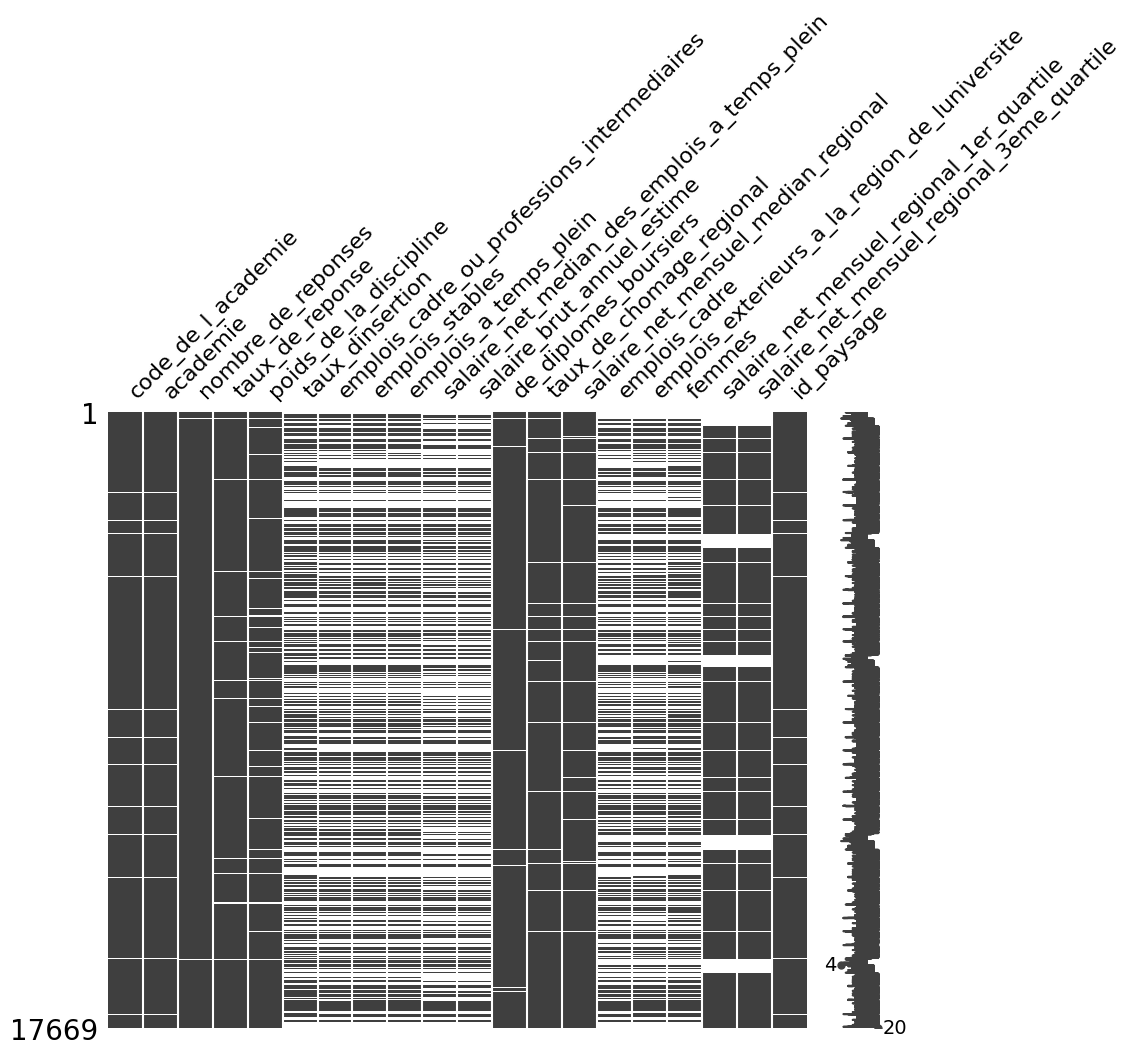

In [156]:
#colonnes nulles et visionage avec missigno

null_cols = nan_per_df.loc[lambda x : x>0].index.tolist()

nan_vals_df = insertion_df[null_cols]
miss.matrix(nan_vals_df, figsize=(10, 8))
plt.show()

#display(null_cols)

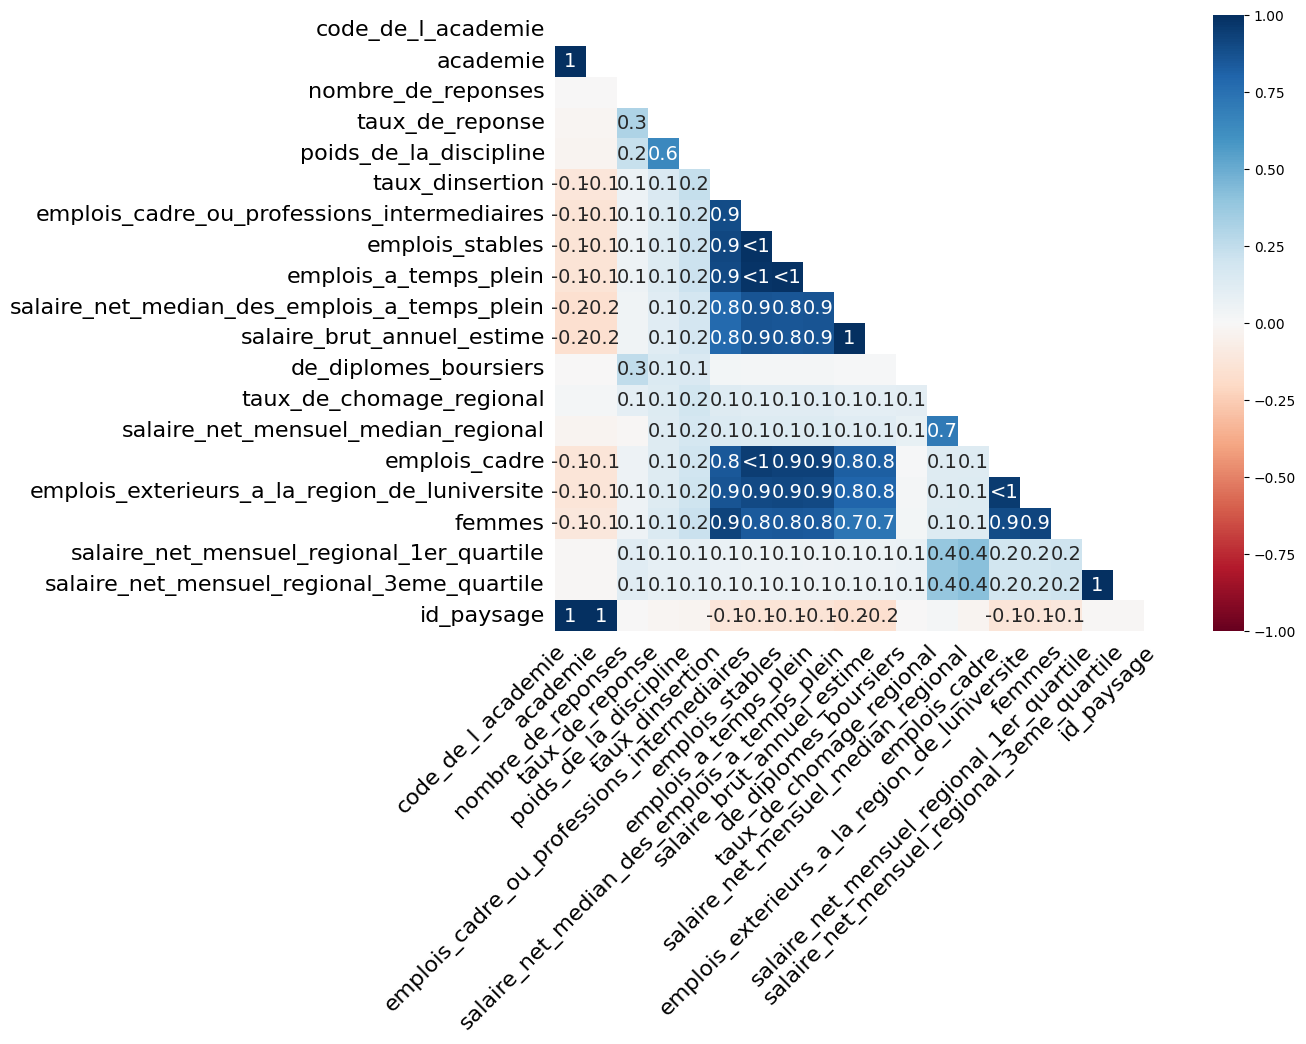

In [157]:
#est ce que nos valeurs manquantes le sont par hasard ? :

miss.heatmap(nan_vals_df, figsize=(10, 8));

#non il y a une forte correlation entre certaines valeurs manquantes

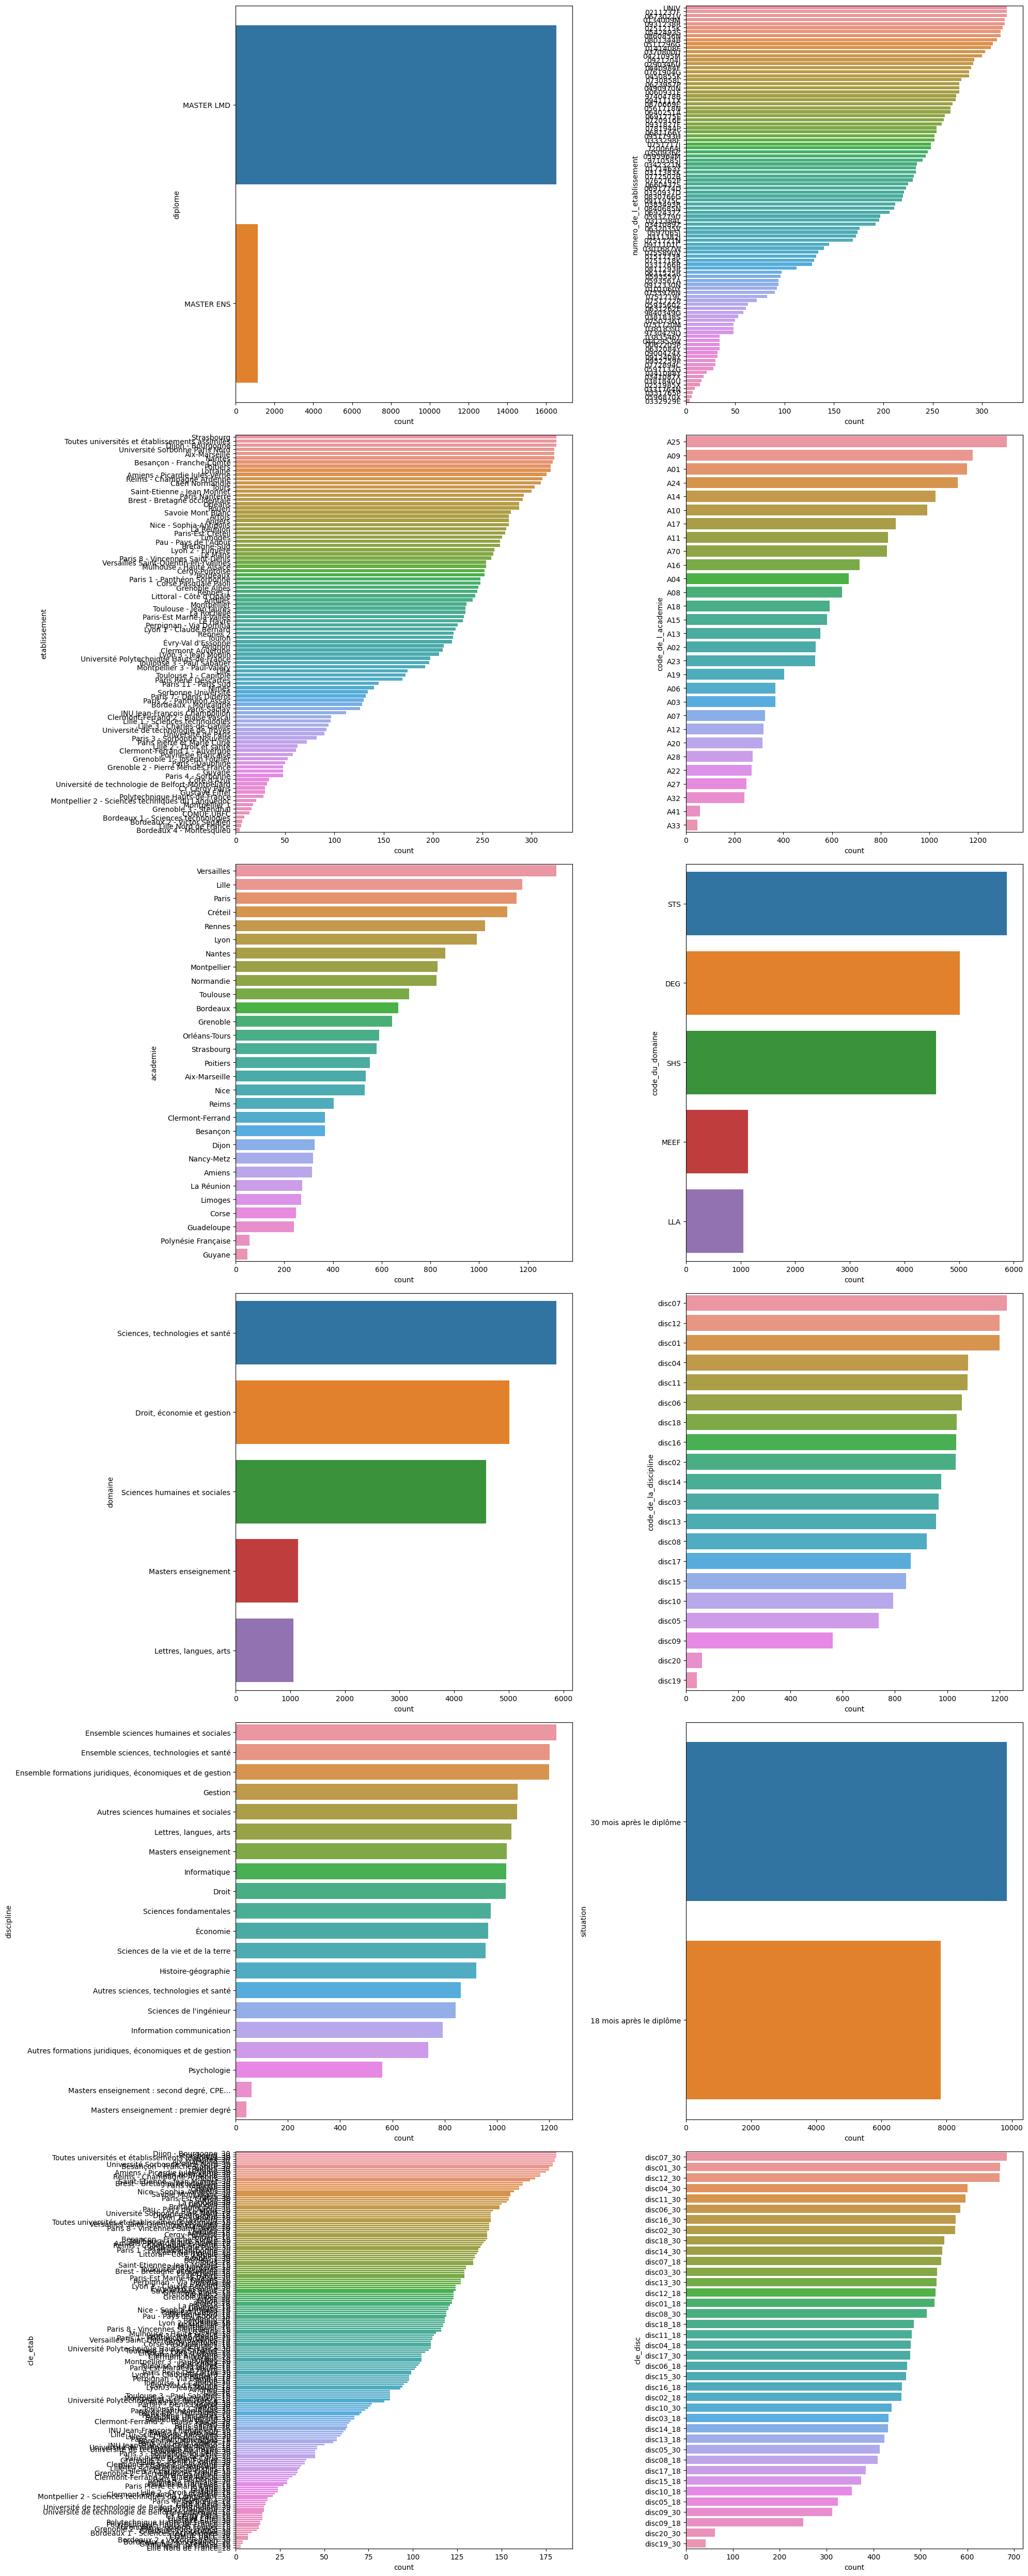

In [158]:
# exploration statique

num_vars = list(insertion_df.select_dtypes(include=['object']).columns)




fig, axes = plt.subplots(len(num_vars)//2, 2, figsize=(20,50))
axes = axes.flatten()

for ax, col in zip(axes, insertion_df.select_dtypes('object').columns):
    sns.countplot(y=col, data=insertion_df, ax=ax, 
                 order=insertion_df[col].value_counts().index);

plt.tight_layout()
plt.show()

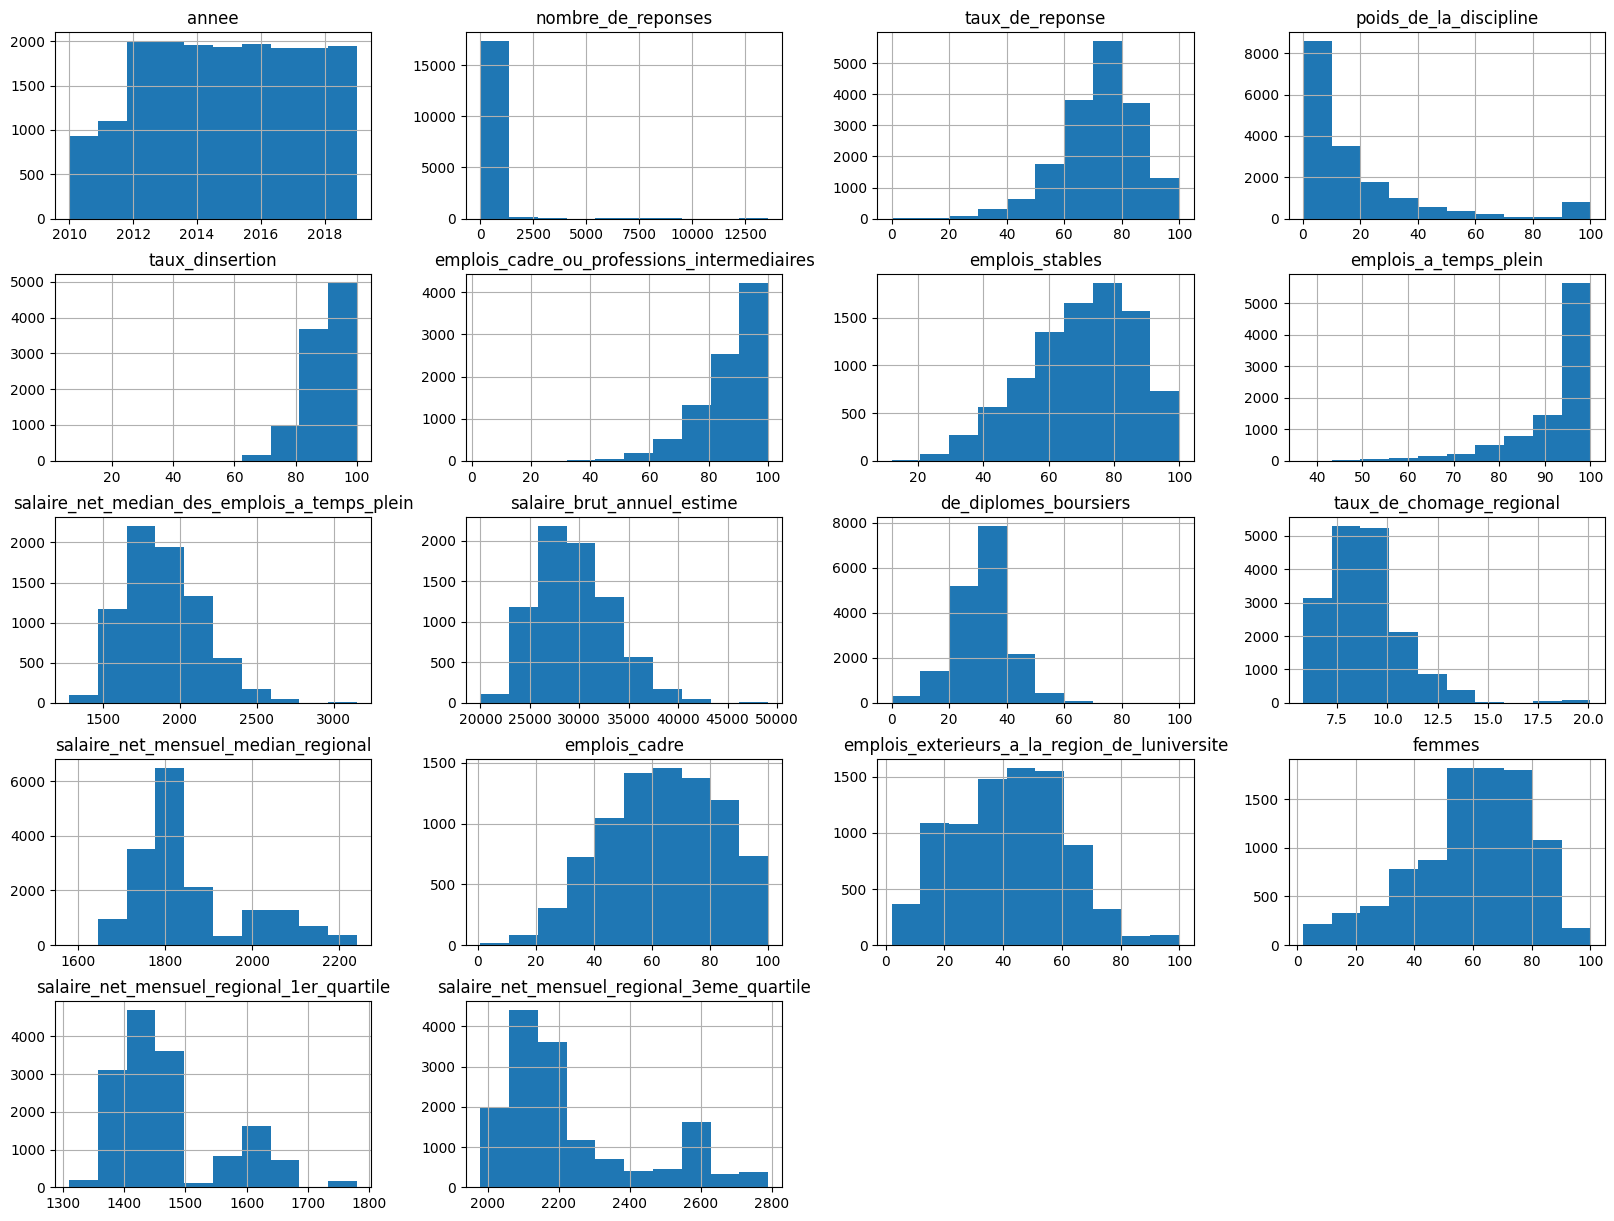

In [160]:
#histogrammes moches mais utiles avec pandas et matplotlib

insertion_df.hist(figsize=(20, 15))
plt.show()


In [175]:
#quelques grqphes interactifs :

#petite fonction d'aide 

def plot_bar_uncat(df,category,measure,orientation="v"):
    fig = fig = px.bar(df.groupby([category]).mean().sort_values(by=[measure],ascending= False).reset_index(),y=measure, color=category,width=1400, height=400,orientation = orientation)
    fig.show()

/tmp/ipykernel_125353/2963779277.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



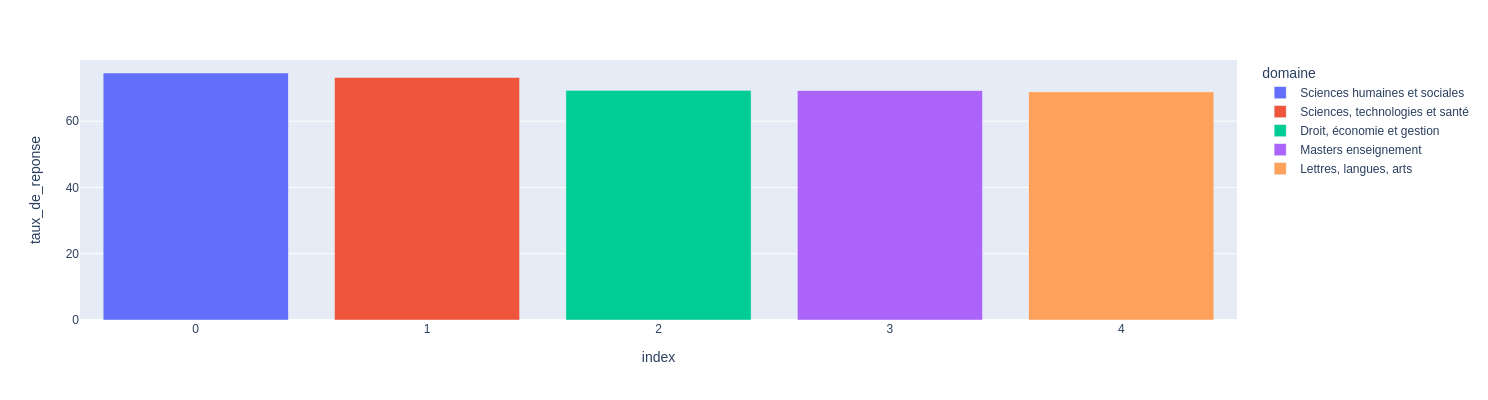

In [176]:
# taux de reponse par domaine :

plot_bar_uncat(insertion_df,"domaine","taux_de_reponse")

/tmp/ipykernel_125353/3058640669.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



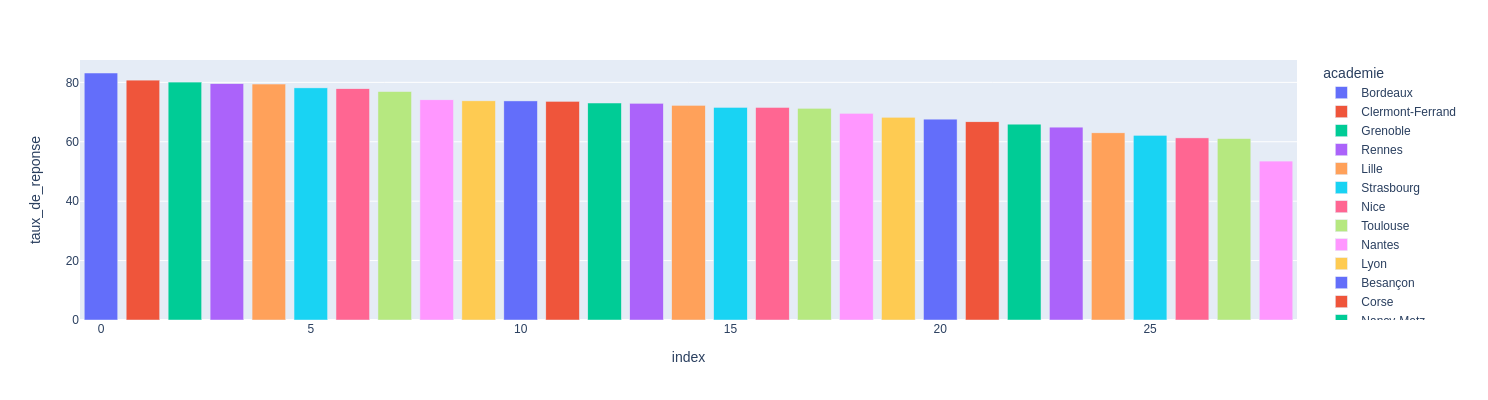

In [62]:
#taux reponse par academie :

plot_bar_uncat(insertion_df,"academie","taux_de_reponse")

In [75]:
# plot multilevel : 

#petite fonction

def plot_treemap_levs(df,levels,measure):
    fig = px.treemap(df.groupby(levels).agg("median").sort_values(by=[measure],ascending= False).reset_index(), path=levels, values=measure,width=1400, height=600)
    fig.show()

/tmp/ipykernel_125353/1316966020.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



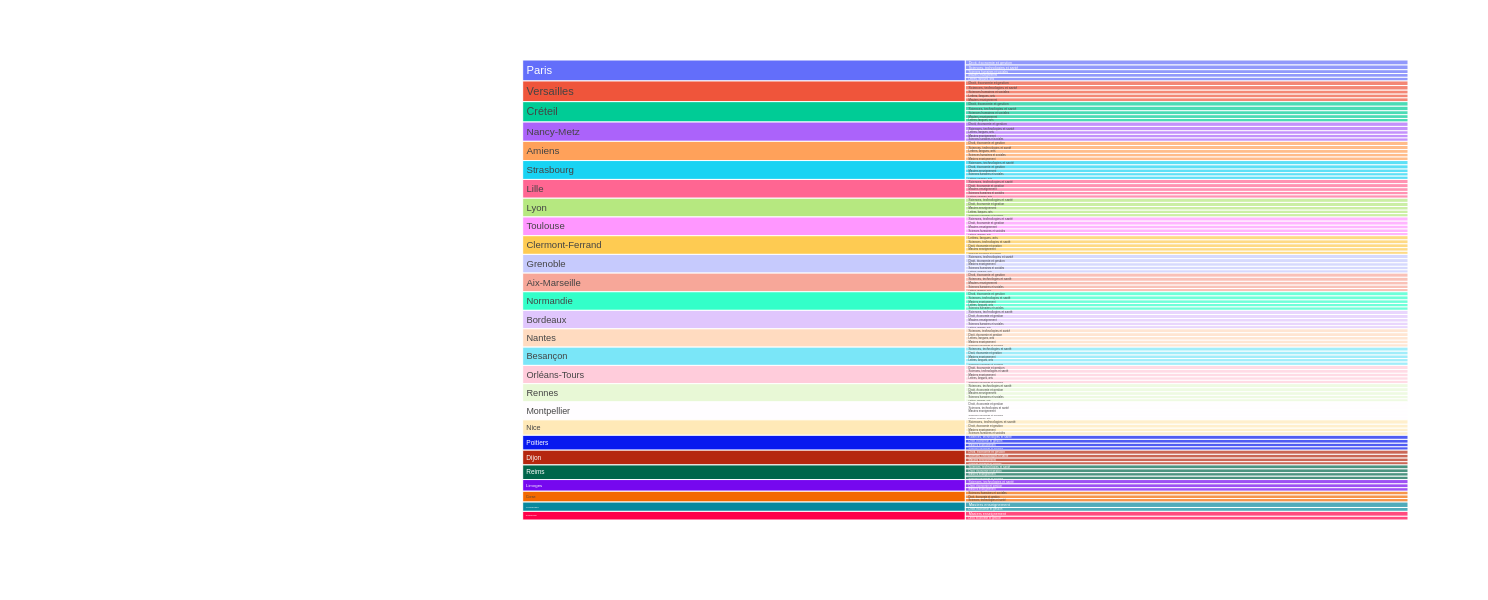

In [180]:
#salaire median mensuel par academie et domaine

plot_treemap_levs(insertion_df,["academie","domaine"],"salaire_net_median_des_emplois_a_temps_plein")

/tmp/ipykernel_125353/2963779277.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



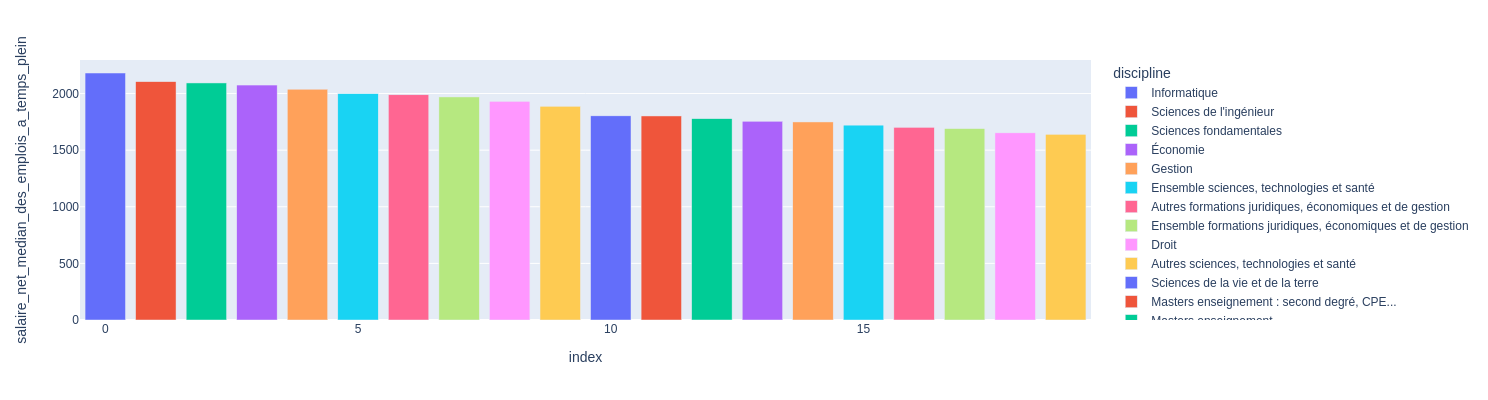

In [179]:
#salaire median par discipline :

plot_bar_uncat(insertion_df,"discipline","salaire_net_median_des_emplois_a_temps_plein")

/tmp/ipykernel_125353/2963779277.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



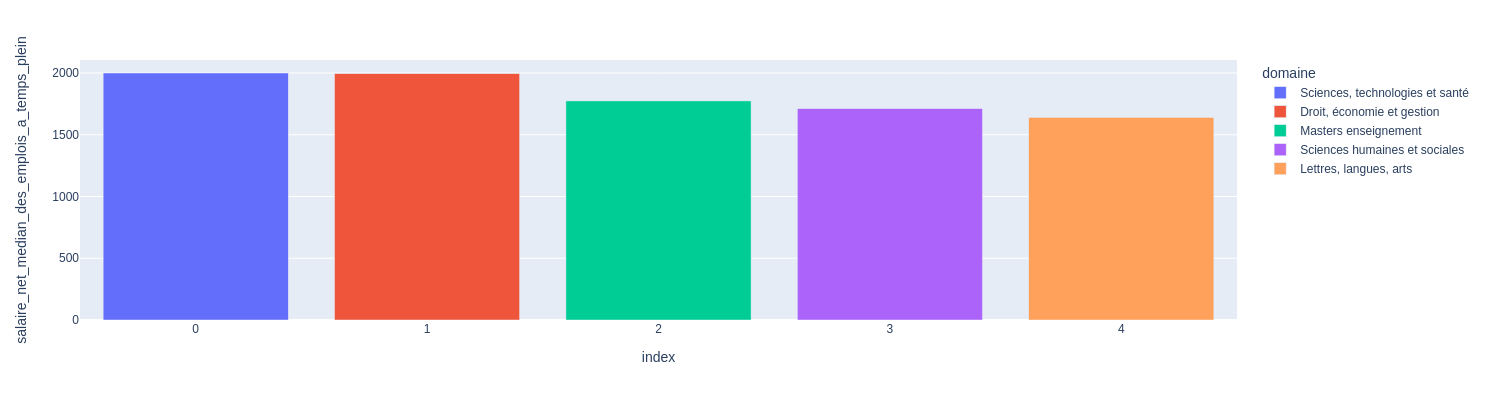

In [190]:
#salaire median par domaine :

plot_bar_uncat(insertion_df,"domaine","salaire_net_median_des_emplois_a_temps_plein")

/tmp/ipykernel_125353/2963779277.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



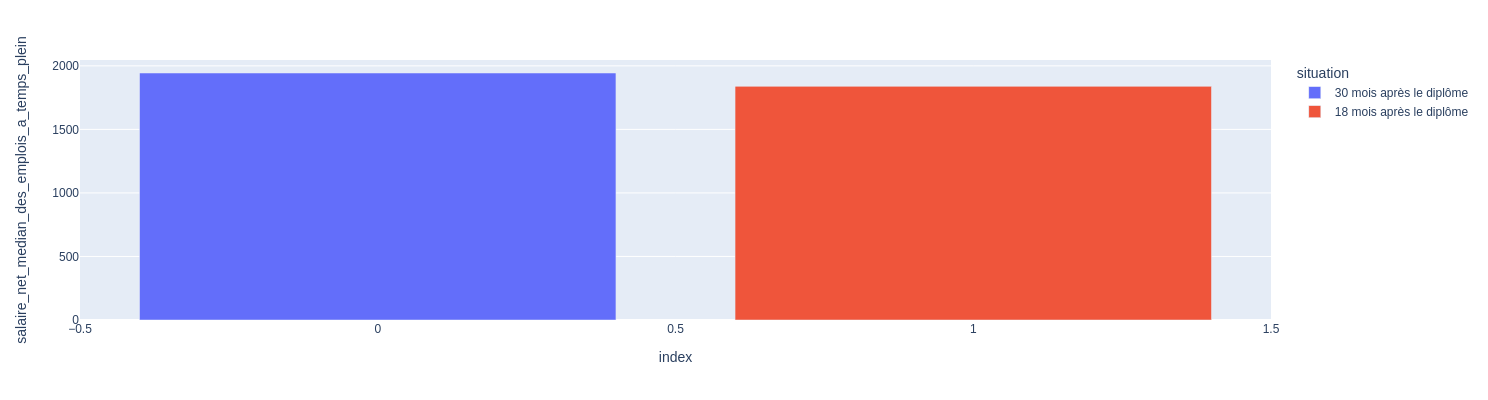

In [191]:
#salaire median par situation :

plot_bar_uncat(insertion_df,"situation","salaire_net_median_des_emplois_a_temps_plein")

/tmp/ipykernel_125353/2963779277.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



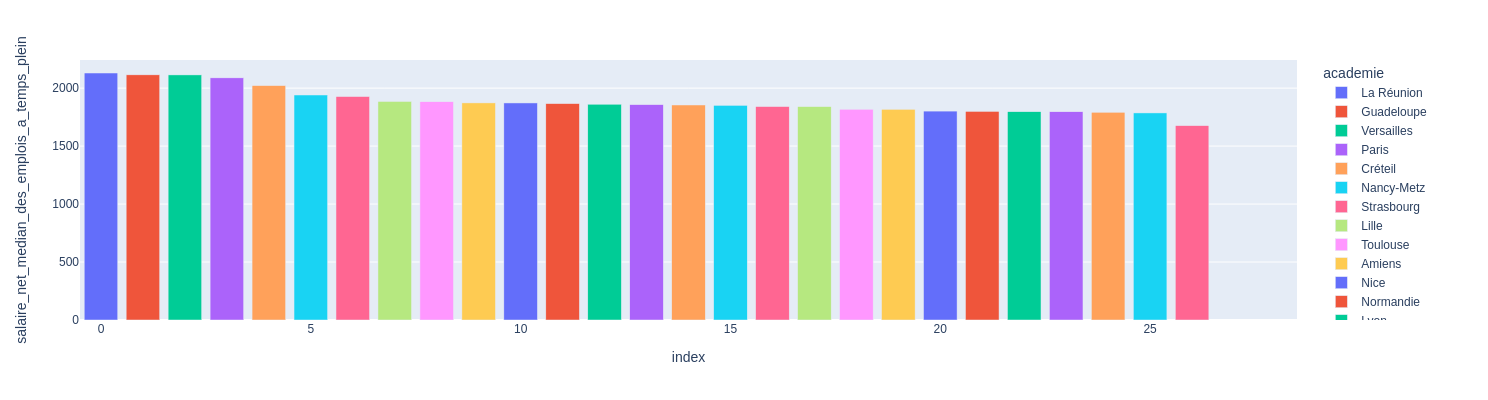

In [181]:
#salaire median par academie :

plot_bar_uncat(insertion_df,"academie","salaire_net_median_des_emplois_a_temps_plein")

/tmp/ipykernel_125353/2963779277.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



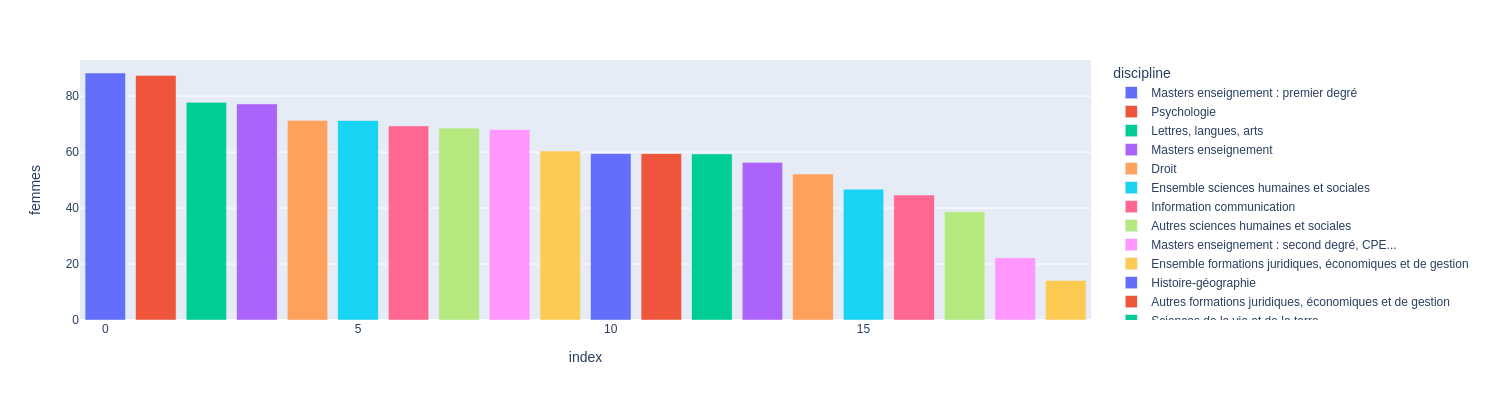

In [178]:
#taux de femmes par discipline

plot_bar_uncat(insertion_df,"discipline","femmes")

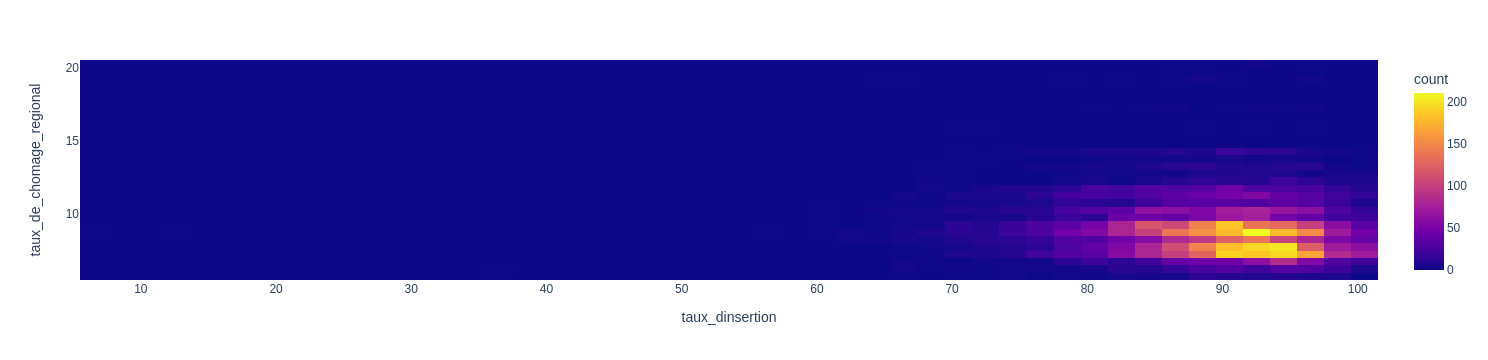

In [163]:
#relation entre taux d'insertion et taux de chomage regional ?

fig = px.density_heatmap(insertion_df,  x="taux_dinsertion",y="taux_de_chomage_regional")
fig.show()


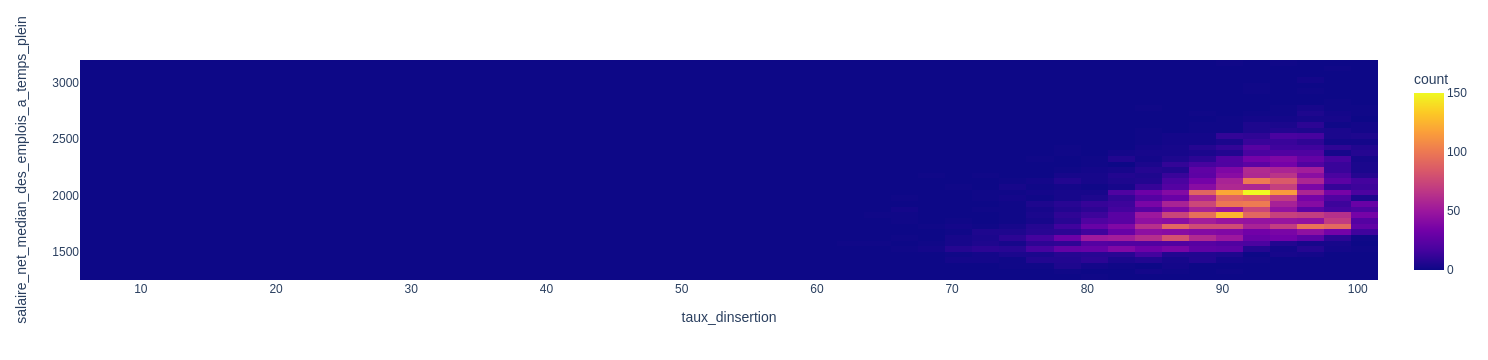

In [186]:
#relation entre taux d'insertion et salaire median ?

fig = px.density_heatmap(insertion_df,  x="taux_dinsertion",y="salaire_net_median_des_emplois_a_temps_plein")
fig.show()


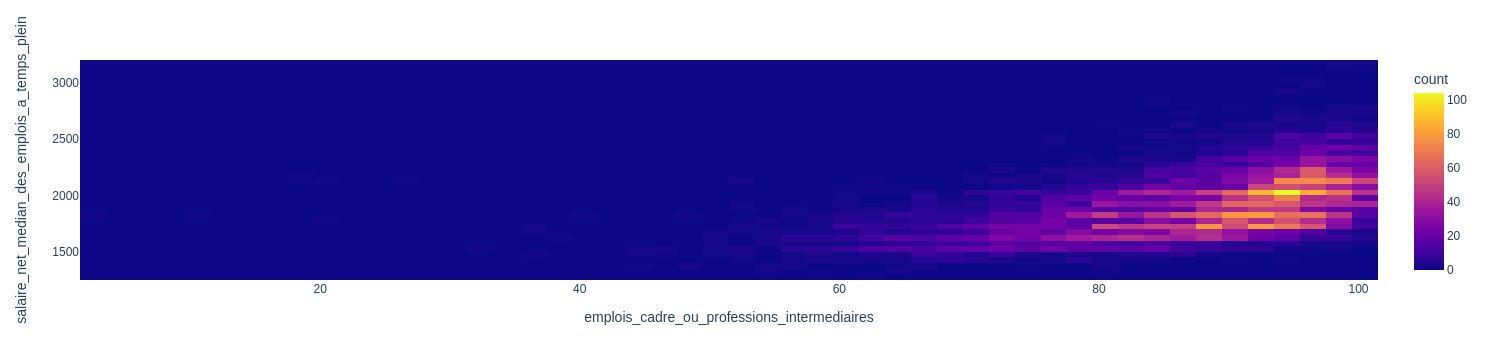

In [189]:
#relation entre taux emploi cardre et salaire median 



fig = px.density_heatmap(insertion_df,x="emplois_cadre_ou_professions_intermediaires",  y="salaire_net_median_des_emplois_a_temps_plein")
fig.show()

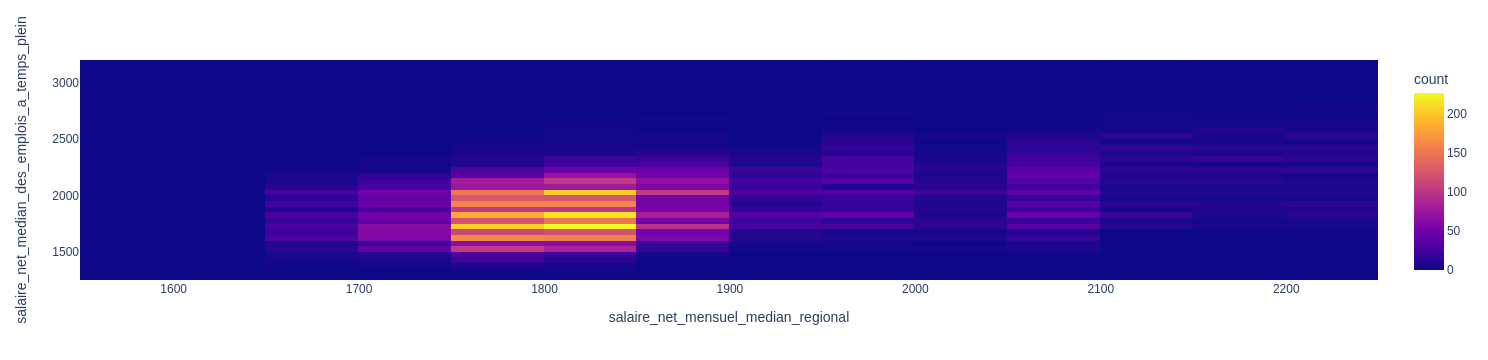

In [185]:
#relation entre le salaire median et le salaire median de la region 

fig = px.density_heatmap(insertion_df,x="salaire_net_mensuel_median_regional",  y="salaire_net_median_des_emplois_a_temps_plein")
fig.show()


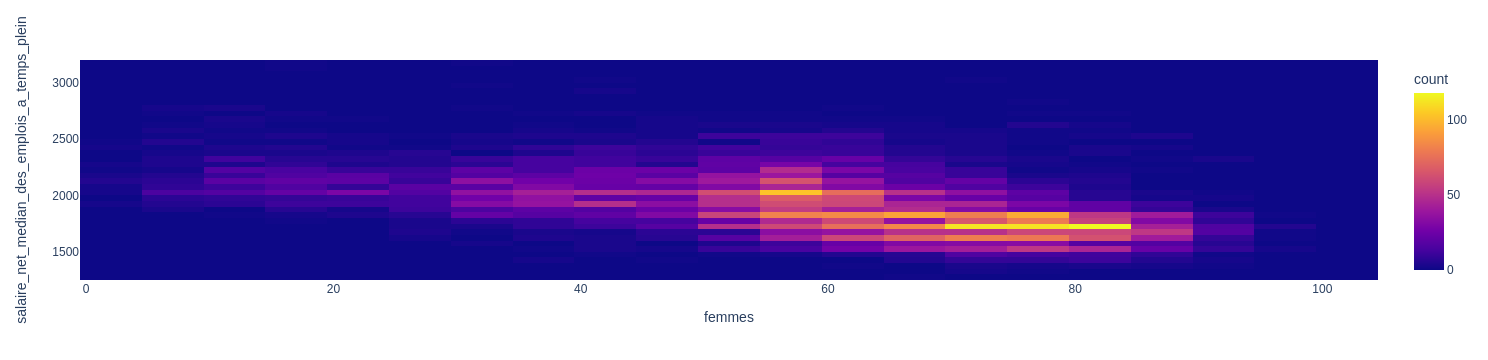

In [187]:

#relation entre femmes et salaire median ?

fig = px.density_heatmap(insertion_df, x="femmes", y="salaire_net_median_des_emplois_a_temps_plein")
fig.show()


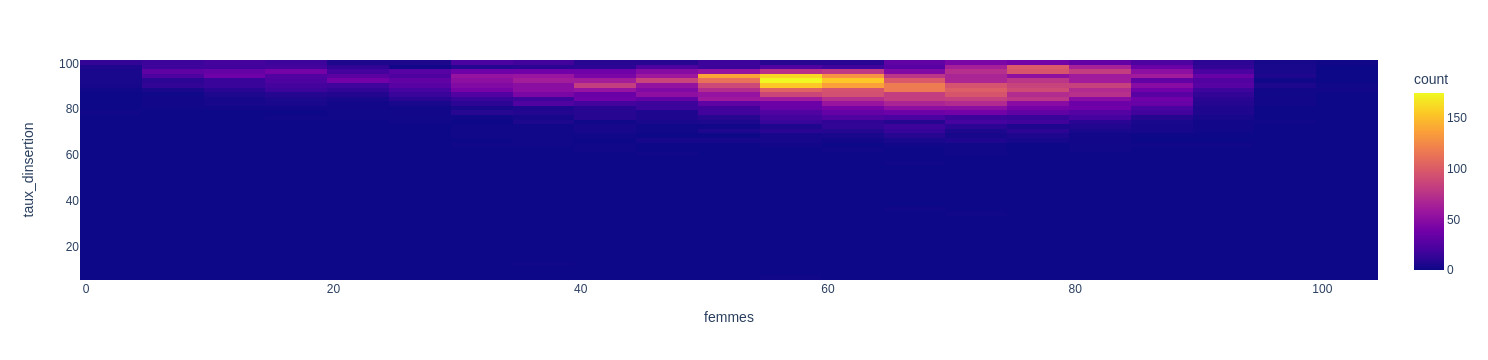

In [188]:
# relation entre taux de femmes et taux d'insertion ?


fig = px.density_heatmap(insertion_df,x="femmes",  y="taux_dinsertion")
fig.show()


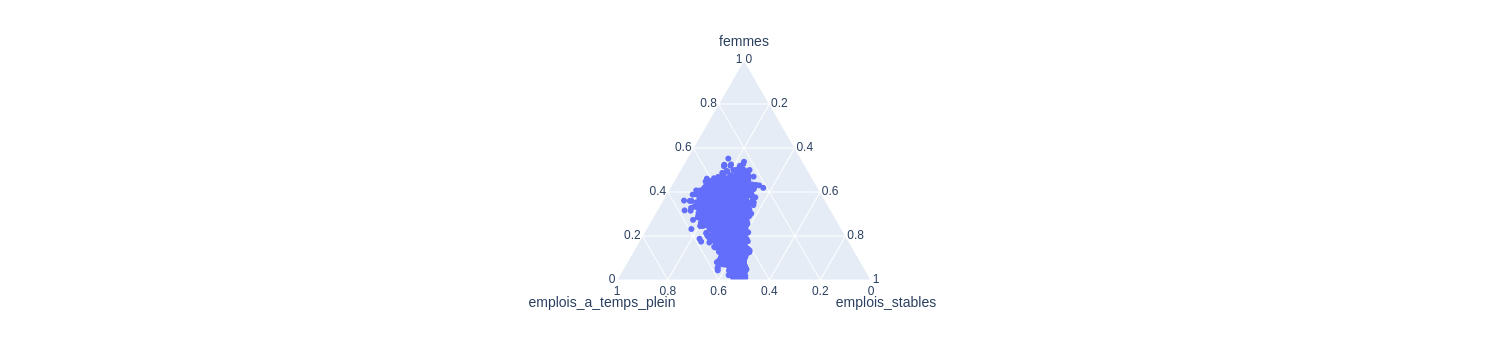

In [172]:
#relation ternaire entre taux emploi stable , taux d'insertion et taux de femmes 

fig = px.scatter_ternary(insertion_df, a="femmes", b="emplois_a_temps_plein", c="emplois_stables")
fig.show()

/tmp/ipykernel_125353/2737260898.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



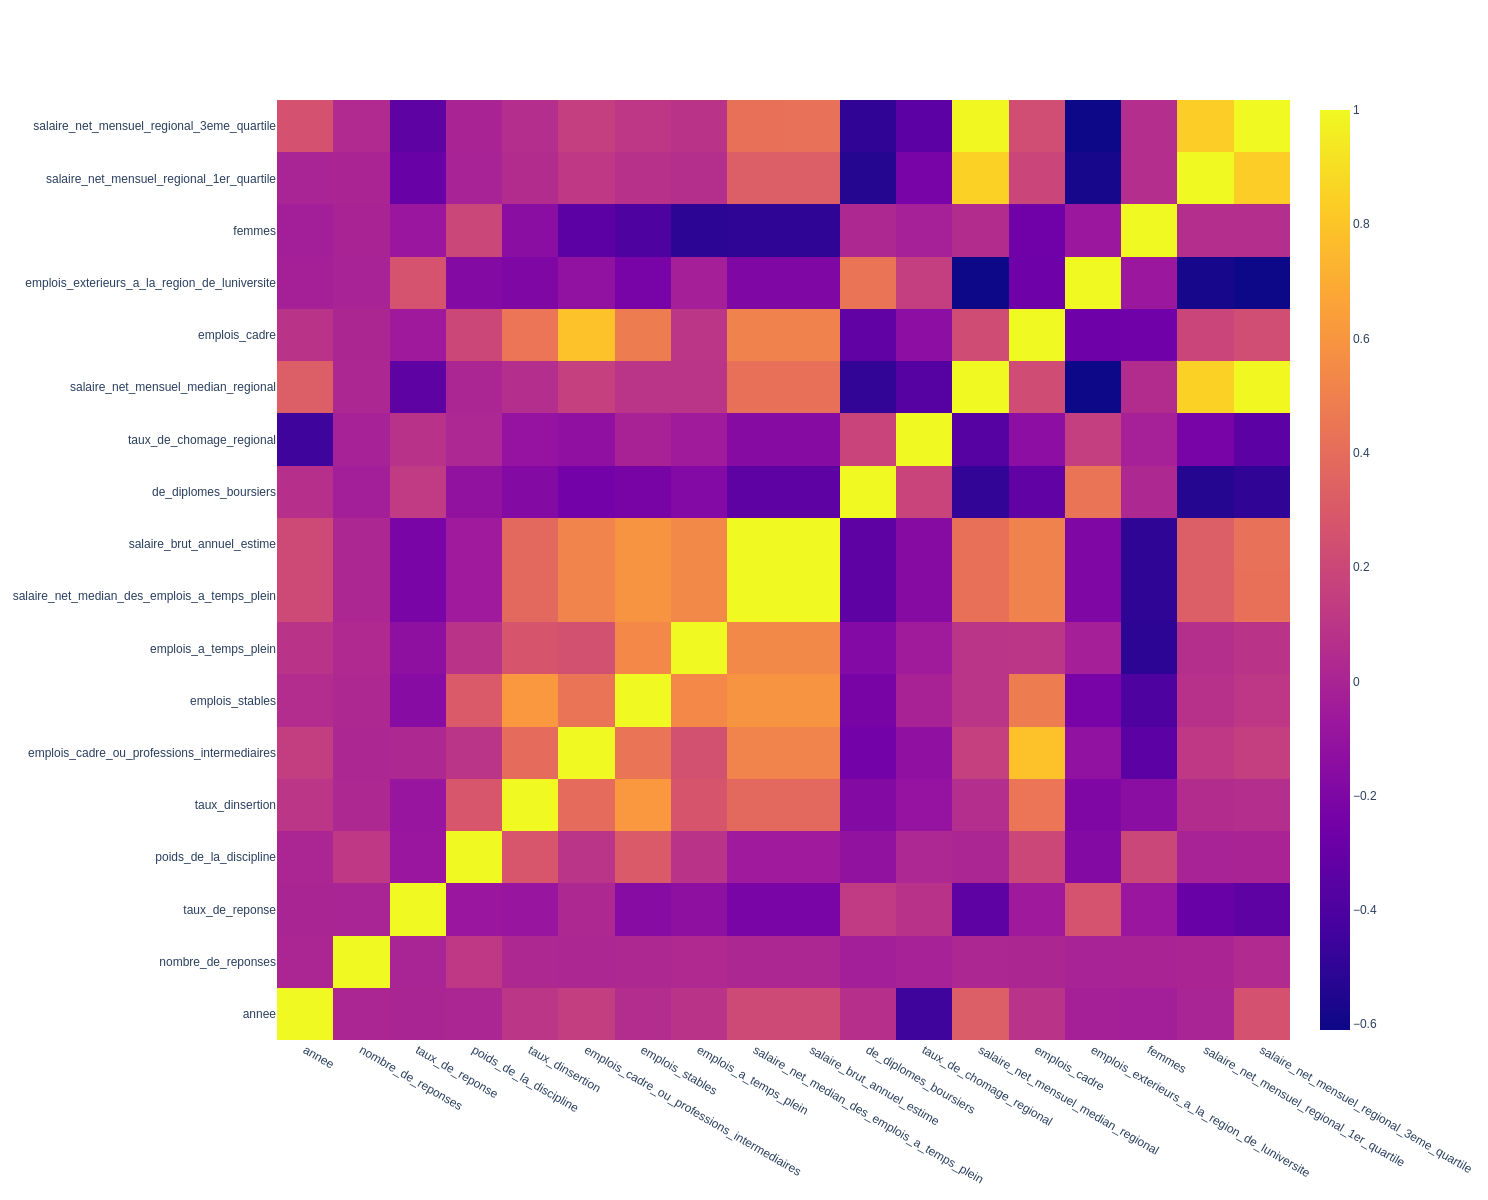

In [88]:
#matrice de correlation :

corr = insertion_df.corr()

trace = go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values)

fig = go.Figure(trace)

fig.update_layout(height = 1200, width = 1600)
fig.show()

In [192]:
#touche de modernité ( et de paresse ) avec pandas profiling

import ydata_profiling as pp

In [193]:
# construction du profile
profile = pp.ProfileReport(insertion_df, title="Insertion pro master")

# sauvegarde du rapport format html
profile.to_file("insertion_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
## Phase 2 : Creation et tests de modeles

In [209]:
#selection de predicteurs forts pour le modele (il existe des methodes plus complexes mais on reste simple ici, on se base sur nos analyses exploratoires) :

strong_preds = ["taux_dinsertion","emplois_cadre_ou_professions_intermediaires","emplois_stables","emplois_a_temps_plein","salaire_net_mensuel_median_regional",
               "femmes","discipline","academie","situation","salaire_net_median_des_emplois_a_temps_plein"]

pred_val = "salaire_net_median_des_emplois_a_temps_plein"



In [210]:
#effectuer du one hot encoding sur les variables categoriques
insertion_ml_df  =  pd.get_dummies(insertion_df[strong_preds], columns = ["discipline","academie","situation"])

display(insertion_ml_df)

taux_dinsertion  emplois_cadre_ou_professions_intermediaires  \
0                 88.0                                         82.0   
1                  NaN                                          NaN   
2                 80.0                                         75.0   
3                 89.0                                         78.0   
4                 93.0                                         92.0   
...                ...                                          ...   
17664             91.0                                         95.0   
17665              NaN                                          NaN   
17666             96.0                                         95.0   
17667             79.0                                          NaN   
17668             83.0                                         93.0   

       emplois_stables  emplois_a_temps_plein  \
0                 83.0                   96.0   
1                  NaN                    NaN   
2                 65.0                   90.0   
3                 64.0                   90.0   
4                 85.0                   98.0   
...                ...                    ...   
17664             75.0                  100.0   
17665              NaN                    NaN   
17666             71.0                   97.0   
17667              NaN                    NaN   
17668             61.0                   77.0   

       salaire_net_mensuel_median_regional  femmes  \
0                                   1750.0     NaN   
1                                   1750.0     NaN   
2                                   1750.0     NaN   
3                                   1750.0     NaN   
4                                   1680.0     NaN   
...                                    ...     ...   
17664                               1810.0    76.0   
17665                               1810.0    41.0   
17666                               1810.0    59.0   
17667                               1810.0    69.0   
17668                               1810.0    73.0   

       salaire_net_median_des_emplois_a_temps_plein  \
0                                            2000.0   
1                                               NaN   
2                                               NaN   
3                                            1750.0   
4                                            2110.0   
...                                             ...   
17664                                        1950.0   
17665                                           NaN   
17666                                        1950.0   
17667                                           NaN   
17668                                        1800.0   

       discipline_Autres formations juridiques, économiques et de gestion  \
0                                                      0                    
1                                                      0                    
2                                                      0                    
3                                                      0                    
4                                                      0                    
...                                                  ...                    
17664                                                  0                    
17665                                                  0                    
17666                                                  1                    
17667                                                  0                    
17668                                                  0                    

       discipline_Autres sciences humaines et sociales  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                       

In [203]:
#importation de sklearn

from sklearn.impute import SimpleImputer #simple strategie de remplacement de valeurs nulles ( juste pour demo )

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



ModuleNotFoundError: No module named 'sklearn'